# №Изучим поведение fft для "дельта-функции". Поскольку наш интеграл на неё очень похож, можно увидеть похожую картину.
Отметим, что преобразование Фурье "настоящей" дельта-функции - константа

In [1]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import ipywidgets as widgets

128 точек
единица в точке номер  67 из 127 , нумерация с нуля


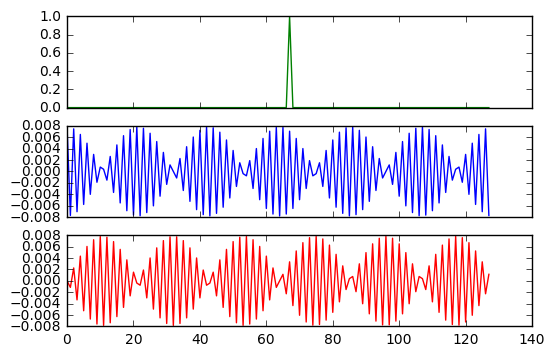

In [2]:
def delta_demo(length, offset_position):
    a = np.zeros(2**length)
    print(2**length, 'точек')
    a[len(a)//2 + offset_position] = 1
    print('единица в точке номер ', len(a)//2 + offset_position, 'из',  2**length-1, ', нумерация с нуля')
    
    plot_original = plt.subplot(311)
    plt.plot(a, 'g')
    plt.setp(plot_original.get_xticklabels(), visible=False)
    
    b = fft.ifft(a)
    
    plot_fft_real = plt.subplot(312, sharex=plot_original)
    plt.plot(b.real, '-')
    plt.setp(plot_fft_real.get_xticklabels(), visible=False)
    
    plot_fft_imag = plt.subplot(313, sharex=plot_original)
    plt.plot(b.imag, 'r-')
    plt.show()
widgets.interact(delta_demo,
                 length = widgets.IntSlider(min= 2,max= 10,step=1,value=3),
                 offset_position=widgets.IntSlider(min= - 100,max= 100,step=1,value=0))

Материал, в котором рассмотрены, в том числе, эффекты, связанные со сдвигом, можно найти здесь http://www.phys.nsu.ru/cherk/Vestnik_Fourier_my_15_09.pdf

Для преобразования Фурье вида $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{ix\xi}f(x)dx$ справедливо $\hat{f(x-x0)(\xi)} = e^{-ix_0\xi}\hat{f(\xi)}$

Для преобразования Фурье вида $\hat{f(\xi)} = \int_{-\infty}^{\infty}e^{2\pi ix\xi}f(x)dx$ справедливо $\hat{f(x-x0)(\xi)} = e^{-2\pi ix_0\xi}\hat{f(\xi)}$

В следующей демонстрации мы попробуем избежать эффекта сдвига и пересчитывать функцию

16 точек
единица в точке номер  7 из 15 , нумерация с нуля


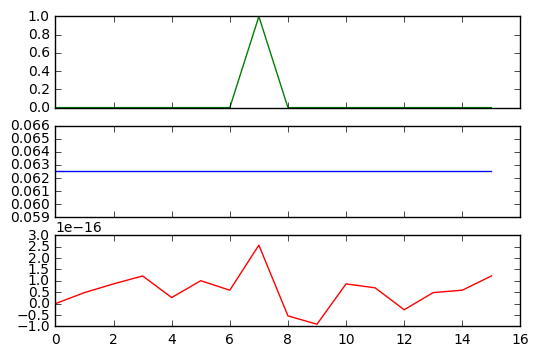

In [7]:
from numpy import exp, pi

def delta_demo(length, offset_position):
    a = np.zeros(2**length)
    print(2**length, 'точек')
    a[len(a)//2 + offset_position] = 1
    print('единица в точке номер ', len(a)//2 + offset_position, 'из',  2**length-1, ', нумерация с нуля')
    
    plot_original = plt.subplot(311)
    plt.plot(a, 'g')
    plt.setp(plot_original.get_xticklabels(), visible=False)
    
    freqs = fft.fftfreq(2**length, d = 1)
    factor = exp(-1j * 2 * pi * (len(a)//2 + offset_position) * freqs)
    b = factor * fft.ifft(a)
    
    plot_fft_real = plt.subplot(312, sharex=plot_original)
    plt.plot(b.real, '-')
    plt.setp(plot_fft_real.get_xticklabels(), visible=False)
    
    plot_fft_imag = plt.subplot(313, sharex=plot_original)
    plt.plot(b.imag, 'r-')
    plt.show()
widgets.interact(delta_demo,
                 length = widgets.IntSlider(min= 2,max= 10,step=1,value=3),
                 offset_position=widgets.IntSlider(min= - 100,max= 100,step=1,value=0))